In [13]:

# Dependencies and Setup
import matplotlib.pyplot as plt
import hvplot.pandas
import pandas as pd
import numpy as np
import requests
import time
import scipy.stats as st
import requests
from pprint import pprint
# Turn off warning messages
import warnings
warnings.filterwarnings('ignore')
from pathlib import Path

In [6]:
CVD_data_to_load = Path("datasets/CVD_cleaned.csv")
CVD_data_df = pd.read_csv(CVD_data_to_load)

In [258]:
CVD_data_df.tail()

,General_Health,Checkup,Exercise,Heart_Disease,Skin_Cancer,Other_Cancer,Depression,Diabetes,Arthritis,Sex,...,Height_(cm),Weight_(kg),BMI,Smoking_History,Alcohol_Consumption,Fruit_Consumption,Green_Vegetables_Consumption,FriedPotato_Consumption,Diet,myField
308849,Very Good,Within the past year,Yes,No,No,No,No,No,No,Male,...,168.0,81.65,29.05,No,4.0,30.0,8.0,0.0,19.0,2.0
308850,Fair,Within the past 5 years,Yes,No,No,No,No,Yes,No,Male,...,180.0,69.85,21.48,No,8.0,15.0,60.0,4.0,37.5,6.0
308851,Very Good,5 or more years ago,Yes,No,No,No,Yes,"Yes, but female told only during pregnancy",No,Female,...,157.0,61.23,24.69,Yes,4.0,40.0,8.0,4.0,24.0,4.0
308852,Very Good,Within the past year,Yes,No,No,No,No,No,No,Male,...,183.0,79.38,23.73,No,3.0,30.0,12.0,0.0,21.0,1.5
308853,Excellent,Within the past year,Yes,No,No,No,No,No,No,Female,...,160.0,81.19,31.71,No,1.0,5.0,12.0,1.0,8.5,1.0


In [238]:
CVD_data_df['Diet'] = CVD_data_df[['Fruit_Consumption', 'Green_Vegetables_Consumption']].mean(axis=1)
CVD_data_df['myField'] = CVD_data_df[['Alcohol_Consumption', 'FriedPotato_Consumption']].mean(axis=1)

In [14]:
# Define a function to create Linear Regression plots
def myRegression(myX,myY):
    mySlope, myInt, myR, myP, myStdErr = st.linregress(myX, myY)
    myLine = mySlope * myX +myInt
    myLineStr = f'y = {mySlope:.2f}x + {myInt:.2f}'
    return myLine, myLineStr, myR

In [275]:
# CVD_data_df
# general_health_df=CVD_data_df.groupby('General_Health')['General_Health'].count()
# exercise_df=CVD_data_df.groupby('Exercise')['Exercise'].count()
# diabetes_df=CVD_data_df.groupby('Diabetes')['Diabetes'].count()
# depression_df=CVD_data_df.groupby('Depression')['Depression'].count()
# alcohol_df=CVD_data_df.groupby('Age_Category')['Alcohol_Consumption'].mean()
# sex_df=CVD_data_df.groupby('Sex')['Sex'].count()
# CVD_by_Exercise_df = CVD_data_df.groupby(['Exercise','Heart_Disease'])['Heart_Disease'].count()
# CVD_by_sex_df = CVD_data_df.groupby(['Sex','Heart_Disease'])['Heart_Disease'].count()
# age_category_df = CVD_data_df.groupby(['Age_Category'])['Age_Category'].count()
# age_category_df.plot(kind ='bar', ) #autopct='%2.2f')
depression_df
# diabetes_df

Depression
No     246953
Yes     61901
Name: Depression, dtype: int64

<Axes: xlabel='Age_Category'>

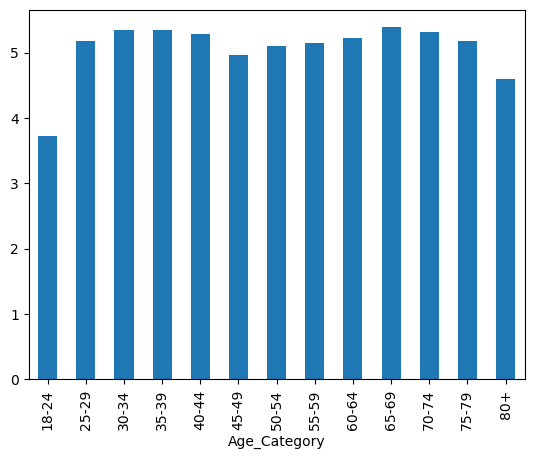

In [246]:
alcohol_df.plot(kind='bar')

In [ ]:
sex_df.plot(kind='pie', autopct = '%2.2f')

<Axes: ylabel='Depression'>

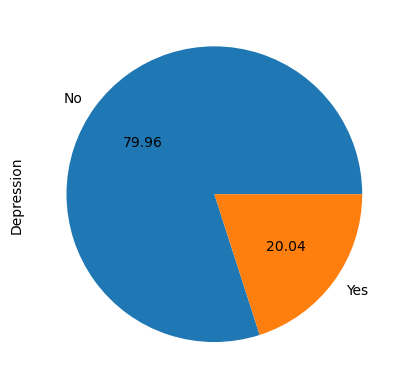

In [169]:
depression_df.plot(kind='pie', autopct='%2.2f')

General_Health
Excellent     55954
Fair          35810
Good          95364
Poor          11331
Very Good    110395
Name: General_Health, dtype: int64

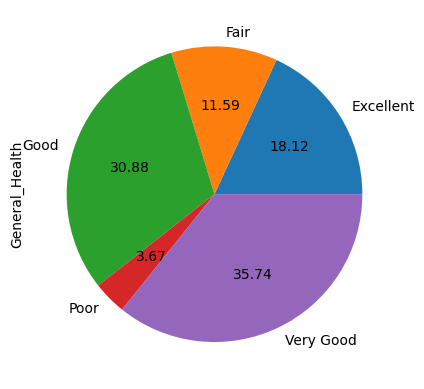

In [267]:
general_health_df
general_health_df.plot(kind='pie',autopct='%2.2f')
general_health_df


<Axes: ylabel='Exercise'>

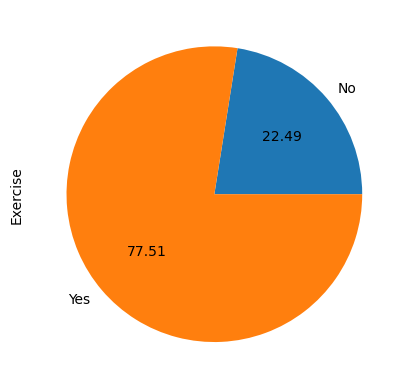

In [162]:

exercise_df.plot(kind='pie',autopct='%2.2f')

<Axes: ylabel='Diabetes'>

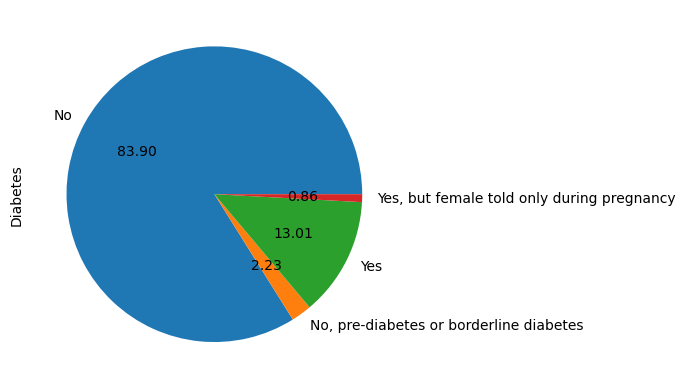

In [70]:
diabetes_df.plot(kind='pie', autopct='%2.2f')

In [182]:
myHealth = ['Good', 'Very Good', 'Excellent']
myHealth_df = CVD_data_df.loc[(CVD_data_df['General_Health'].isin(myHealth) & CVD_data_df['FriedPotato_Consumption']==0),:]

The R value for fried potato consumption vs Weight is 0.05


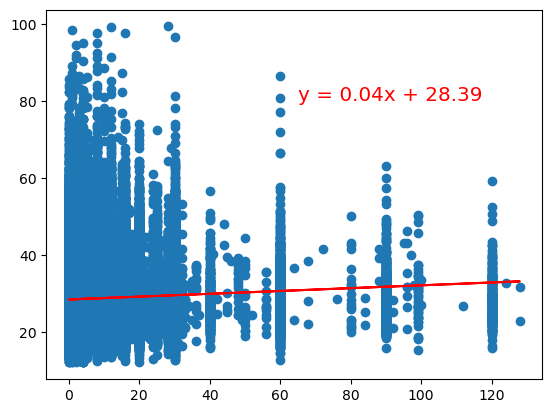

In [240]:
plt.scatter(CVD_data_df['FriedPotato_Consumption'],CVD_data_df['BMI'])
nLine, nString, nR = myRegression(CVD_data_df['FriedPotato_Consumption'], CVD_data_df['BMI'])
plt.plot(CVD_data_df['FriedPotato_Consumption'],nLine,"-", color='r')
plt.text(65, 80, f'{nString}', c='r', fontsize = 'x-large')
print(f'The R value for fried potato consumption vs Weight is {nR :.2f}')

The R value for BMI vs Weight_(kg) is 0.88


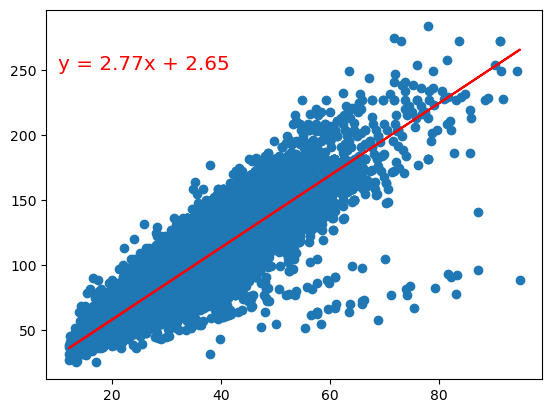

In [256]:
plt.scatter(myHealth_df['BMI'],myHealth_df['Weight_(kg)'])
nLine, nString, nR = myRegression(myHealth_df['BMI'], myHealth_df['Weight_(kg)'])
plt.plot(myHealth_df['BMI'],nLine,"-", color='r')
plt.text(10, 250, f'{nString}', c='r', fontsize = 'x-large')
print(f'The R value for BMI vs Weight_(kg) is {nR :.2f}')

In [135]:
CVD_by_Exercise_df = CVD_data_df.groupby(['Exercise','Heart_Disease'])['Heart_Disease'].count()
CVD_by_Exercise_df.info()

<class 'pandas.core.series.Series'>
MultiIndex: 4 entries, ('No', 'No') to ('Yes', 'Yes')
Series name: Heart_Disease
Non-Null Count  Dtype
--------------  -----
4 non-null      int64
dtypes: int64(1)
memory usage: 191.0+ bytes


In [136]:
CVD_by_Exercise_df

Exercise  Heart_Disease
No        No                60469
          Yes                9004
Yes       No               223414
          Yes               15967
Name: Heart_Disease, dtype: int64

In [159]:
critical_value=st.chi2.ppf(q = 0.95,  df = 1)
critical_value

3.841458820694124

In [261]:
CVD_by_sex_df

Sex     Heart_Disease
Female  No               150298
        Yes                9898
Male    No               133585
        Yes               15073
Name: Heart_Disease, dtype: int64

In [154]:
observed = pd.Series([CVD_by_Exercise_df[0],CVD_by_Exercise_df[1]], index=['1','2'])
expected = pd.Series([CVD_by_Exercise_df[2],CVD_by_Exercise_df[3]], index=['1','2'])
Chisqr = pd.DataFrame([observed, expected]).T


In [155]:
Chisqr.columns = ['Observed', 'Expected']
Chisqr['%Obs'] = Chisqr['Observed']/Chisqr['Observed'].sum()
Chisqr['%Exp'] = Chisqr['Expected']/Chisqr['Expected'].sum()

In [156]:
Chisqr

,Observed,Expected,%Obs,%Exp
1,60469,223414,0.870396,0.933299
2,9004,15967,0.129604,0.066701


In [157]:
st.chisquare(Chisqr['%Obs'], Chisqr['%Exp'])

Power_divergenceResult(statistic=0.06356086988945277, pvalue=0.8009538673485311)

<Axes: ylabel='Frequency'>

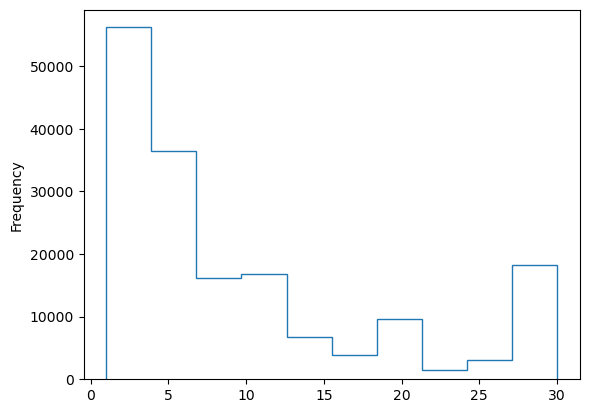

In [252]:
CVD_data_df.loc[(CVD_data_df['Alcohol_Consumption']>0)]['Alcohol_Consumption'].plot(kind='hist', histtype='step')

<Axes: title={'center': 'Alcohol_Consumption'}, xlabel='Age_Category'>

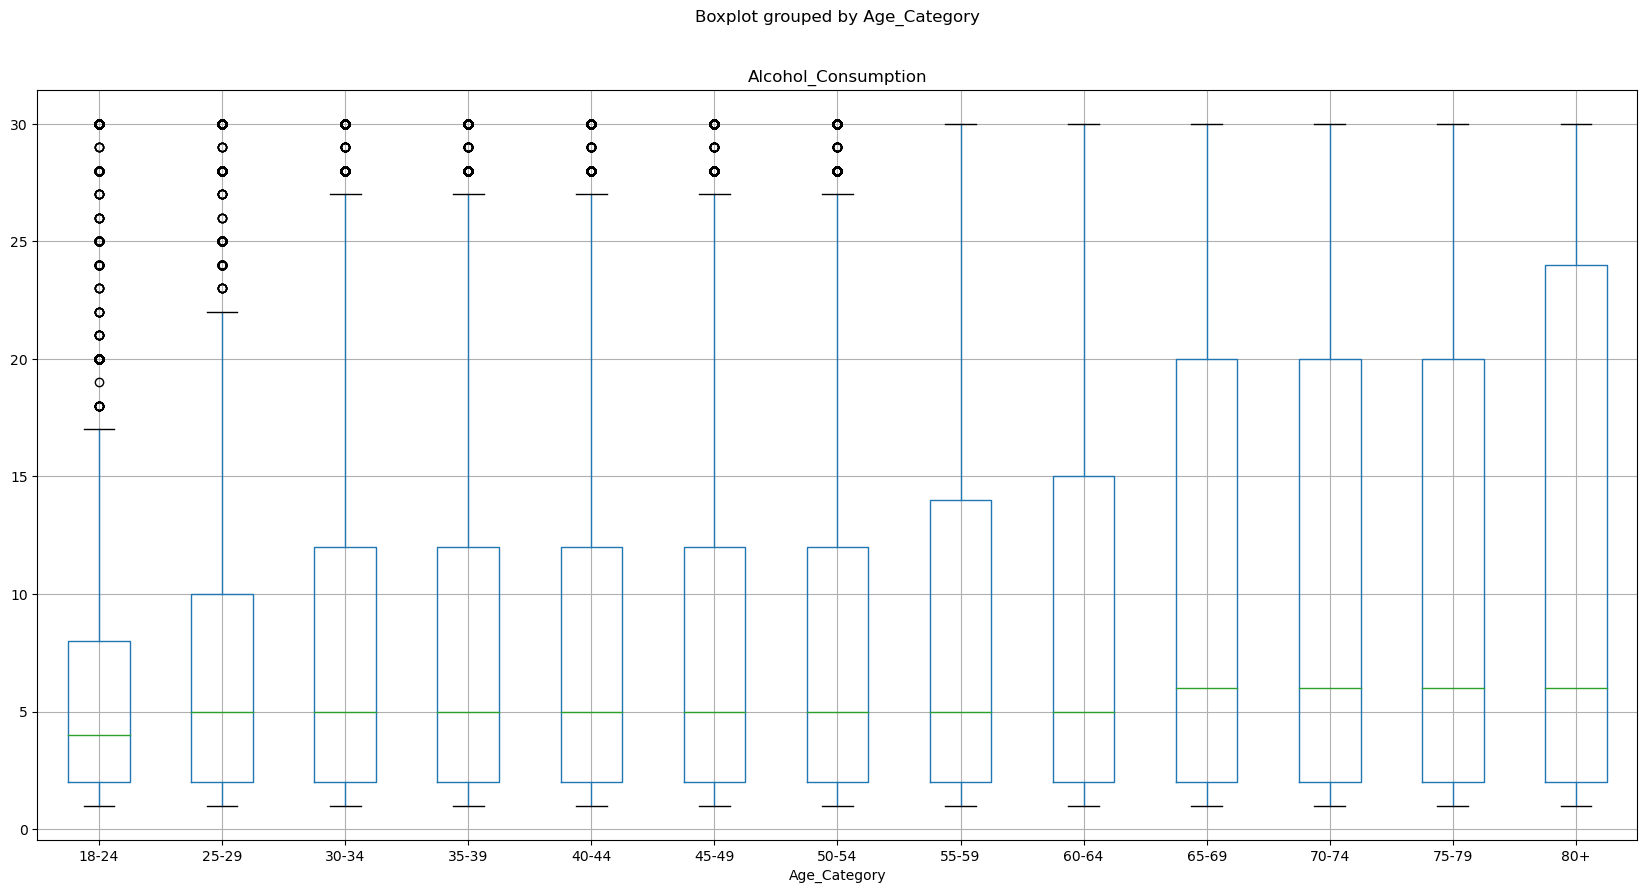

In [253]:
CVD_data_df.loc[(CVD_data_df['Alcohol_Consumption']>0)].boxplot('Alcohol_Consumption', by='Age_Category', figsize=(20,10))

In [270]:
group0 = CVD_data_df.loc[(CVD_data_df['Age_Category']=='18-24') & (CVD_data_df['Alcohol_Consumption'] > 0)]['Alcohol_Consumption']
group1 = CVD_data_df.loc[(CVD_data_df['Age_Category']=='25-29') & (CVD_data_df['Alcohol_Consumption'] > 0)]['Alcohol_Consumption']
group2 = CVD_data_df.loc[(CVD_data_df['Age_Category']=='30-34') & (CVD_data_df['Alcohol_Consumption'] > 0)]['Alcohol_Consumption']
group3 = CVD_data_df.loc[(CVD_data_df['Age_Category']=='35-39') & (CVD_data_df['Alcohol_Consumption'] > 0)]['Alcohol_Consumption']
group4 = CVD_data_df.loc[(CVD_data_df['Age_Category']=='40-44') & (CVD_data_df['Alcohol_Consumption'] > 0)]['Alcohol_Consumption']
group5 = CVD_data_df.loc[(CVD_data_df['Age_Category']=='45-49') & (CVD_data_df['Alcohol_Consumption'] > 0)]['Alcohol_Consumption']
group6 = CVD_data_df.loc[(CVD_data_df['Age_Category']=='50-54') & (CVD_data_df['Alcohol_Consumption'] > 0)]['Alcohol_Consumption']
group7 = CVD_data_df.loc[(CVD_data_df['Age_Category']=='55-59') & (CVD_data_df['Alcohol_Consumption'] > 0)]['Alcohol_Consumption']
group8 = CVD_data_df.loc[(CVD_data_df['Age_Category']=='60-64') & (CVD_data_df['Alcohol_Consumption'] > 0)]['Alcohol_Consumption']
group9 = CVD_data_df.loc[(CVD_data_df['Age_Category']=='65-69') & (CVD_data_df['Alcohol_Consumption'] > 0)]['Alcohol_Consumption']
group10 = CVD_data_df.loc[(CVD_data_df['Age_Category']=='70-74') & (CVD_data_df['Alcohol_Consumption'] > 0)]['Alcohol_Consumption']
group11 = CVD_data_df.loc[(CVD_data_df['Age_Category']=='75-79') & (CVD_data_df['Alcohol_Consumption'] > 0)]['Alcohol_Consumption']
group12 = CVD_data_df.loc[(CVD_data_df['Age_Category']=='80+') & (CVD_data_df['Alcohol_Consumption'] > 0)]['Alcohol_Consumption']
st.f_oneway(group0, group1, group2, group3, group4, group5, group6, group7, group8, group9, group10, group11, group12)

F_onewayResult(statistic=327.80461745937885, pvalue=0.0)